In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


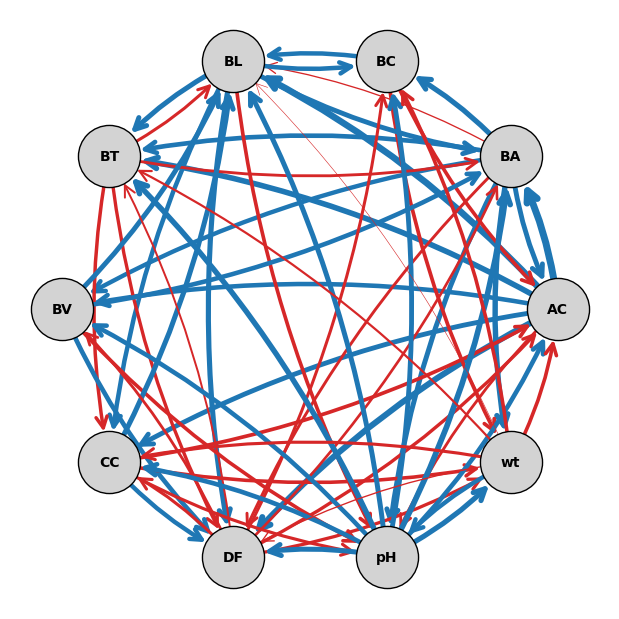

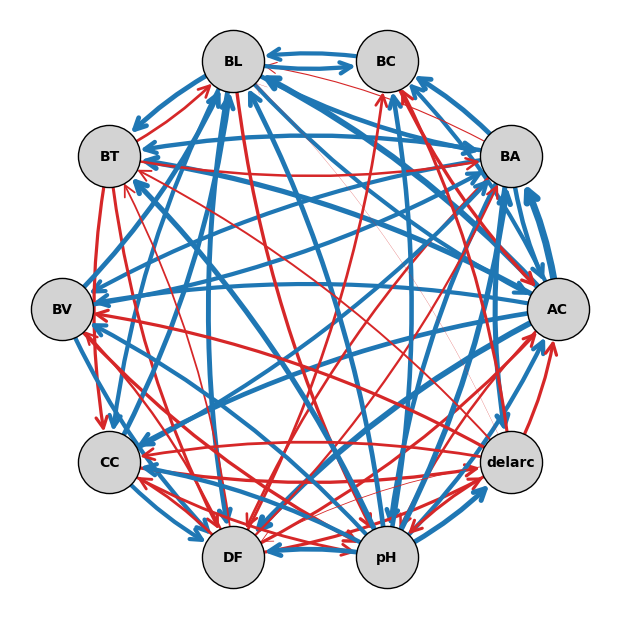

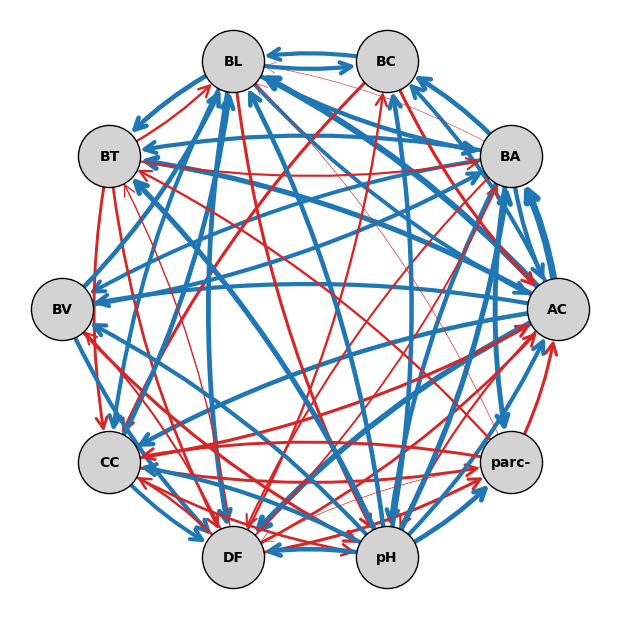

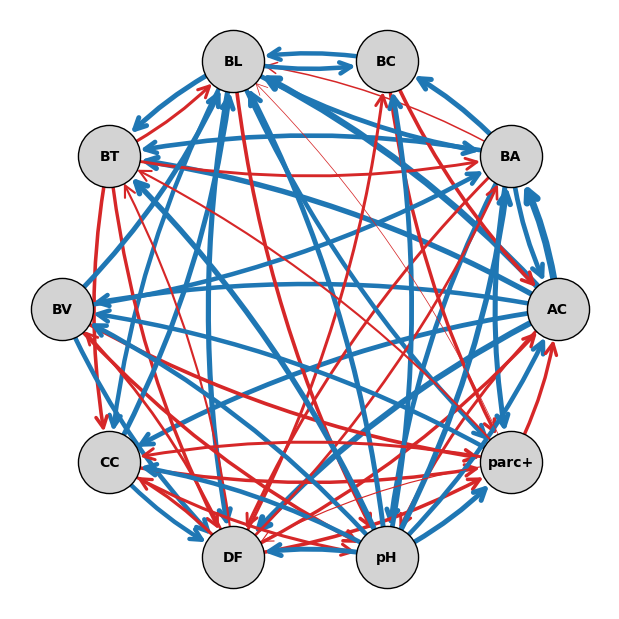

In [2]:
# species that aren't ecoli
not_ecoli = ['AC_OD', 'BA_OD', 'BC_OD', 'BL_OD', 'BT_OD', 'BV_OD', 'CC_OD', 'DF_OD', 'pH']

# set of ecoli strains
ecoli_strains =  ['wt_OD', 'delarc_OD', 'parc-_OD', 'parc+_OD']

# min and max (scaled) pH
pH_min = .3
pH_max = .7

# loop over ecoli strains
for ecoli_strain in ecoli_strains:

    # species + single ecoli strain
    species_and_strain = not_ecoli + [ecoli_strain]

    # init network btw species and pH
    S2S = np.zeros([len(species_and_strain), len(species_and_strain)])
    
    # loop over receiver strains
    for i, receiver in enumerate(species_and_strain):
    
        # import SHAP values 
        int_df = pd.read_csv(f"insights/{ecoli_strain}/{receiver}_shap.csv")
        
        # consider nominal pH conditions
        pH_vals = int_df['pH'].values
        pH_inds = (pH_min < pH_vals) & (pH_vals < pH_max)
        int_df = int_df.iloc[pH_inds].copy()
        
        # loop over effector strains
        for j, effector in enumerate(species_and_strain):

            # only consider samples with both receiver and effector species present
            receiver_design = int_df[receiver].values
            effector_design = int_df[effector].values
            interaction = int_df[f"{receiver}<--{effector}"].values[(receiver_design>0) & (effector_design>0)]

            # save average interaction
            S2S[i,j] = np.mean(interaction)
            
    # Create a directed graph
    G = nx.DiGraph()

    # add nodes
    s_names = [s.split("_")[0] for s in species_and_strain]
    G.add_nodes_from(s_names)

    # min required magnitude to show edge
    edge_min = .05

    # Add edges connecting species to species
    for i, receiver in enumerate(s_names):
        for j, effector in enumerate(s_names):
            if i != j:
                if np.abs(S2S[i, j]) > edge_min:
                    if S2S[i, j] > 0:
                        G.add_edge(effector, receiver, width=S2S[i, j], color='tab:blue')
                    else:
                        G.add_edge(effector, receiver, width=S2S[i, j], color='tab:red')

    # Draw the graph with labeled nodes and edges
    pos = nx.circular_layout(G)

    # Get edge weights for drawing edge widths
    edge_max = max([G[u][v]['width'] for (u, v) in G.edges()])
    edge_min = min([G[u][v]['width'] for (u, v) in G.edges()])

    # set edge widths, node sizes, and arrow sizes
    edge_set_max = 5
    edge_set_min = 0
    widths = [(G[u][v]['width'] - edge_min) / (edge_max - edge_min) * (edge_set_max - edge_set_min) + edge_set_min
              for (u, v) in G.edges()]

    # Draw the network graph
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, 
            with_labels=True, 
            node_size=2000, 
            node_color='lightgray',
            edgecolors='black',
            font_size=10, 
            font_weight='bold',
            font_color='black', 
            arrowsize=20, 
            connectionstyle='arc3, rad=.1',
            arrowstyle='->',
            width=widths, 
            min_source_margin=10,
            edge_color=[G[u][v]['color'] for u, v in G.edges()],
            edge_cmap=plt.cm.Greys)
    plt.axis('off')

    # plt.savefig(f"figures/slides/glv_net_VI.png", dpi=300)
    plt.show()

In [3]:
int_df

Experiments  parc+_OD<--AC_OD  parc+_OD<--BA_OD  parc+_OD<--BC_OD  \
8    7comm11parc_1         -0.041011          0.168047         -0.101336   
9    7comm11parc_2         -0.042070          0.168992         -0.092979   
10   7comm11parc_3         -0.044753          0.169989         -0.104561   
11   7comm11parc_4         -0.039592          0.159667         -0.079064   
25     parc+_pH7_0          0.027436         -0.078733          0.030328   
26     parc+_pH7_1          0.027985         -0.070801          0.031939   
27     parc+_pH7_2          0.028312         -0.075853          0.032311   
43        AC_pH7_0         -0.008855         -0.018301          0.009499   
44        AC_pH7_1         -0.008564         -0.015277          0.008177   
45        AC_pH7_2         -0.008404         -0.017314          0.008882   
46        AC_pH8_0         -0.008943         -0.016003          0.009431   
47        AC_pH8_1         -0.008854         -0.017793          0.007752   
48        AC_pH8_2         -0.008868         -0.017929          0.009110   
61        BA_pH7_0          0.002903          0.016514          0.010569   
62        BA_pH7_1          0.001853          0.016107          0.010263   
63        BA_pH7_2          0.004185          0.016102          0.010030   
64        BA_pH8_0          0.003502          0.016682          0.009830   
65        BA_pH8_1          0.003099          0.016722          0.009420   
66        BA_pH8_2          0.002227          0.016921          0.009648   
79        BC_pH7_0          0.002719         -0.013833         -0.006165   
80        BC_pH7_1          0.005020         -0.017061         -0.006175   
81        BC_pH7_2          0.005522         -0.017786         -0.006142   
82        BC_pH8_0          0.003926         -0.014418         -0.006259   
83        BC_pH8_1          0.003570         -0.015186         -0.006192   
84        BC_pH8_2          0.004089         -0.013492         -0.006172   
97        BL_pH7_0          0.002720         -0.017468          0.009917   
98        BL_pH7_1          0.004455         -0.017198          0.009733   
99        BL_pH7_2          0.004589         -0.017814          0.008657   
100       BL_pH8_0          0.003910         -0.017147          0.010630   
101       BL_pH8_1          0.004063         -0.017994          0.010309   
102       BL_pH8_2          0.005289         -0.018945          0.008452   
115       BT_pH7_0          0.004731         -0.015607          0.010196   
116       BT_pH7_1          0.005203         -0.015741          0.009049   
117       BT_pH7_2          0.004329         -0.015461          0.009589   
118       BT_pH8_0          0.004619         -0.016636          0.009801   
119       BT_pH8_1          0.003850         -0.015587          0.009611   
120       BT_pH8_2          0.005151         -0.015725          0.007998   
133       BV_pH7_0          0.004673         -0.015295          0.009733   
134       BV_pH7_1          0.002689         -0.014276          0.009132   
135       BV_pH7_2          0.004399         -0.014008          0.007731   
136       BV_pH8_0          0.003935         -0.014600          0.008193   
137       BV_pH8_1          0.004466         -0.015804          0.009120   
138       BV_pH8_2          0.003661         -0.015376          0.008964   
151       CC_pH7_0          0.004995         -0.018226          0.009476   
152       CC_pH7_1          0.003983         -0.017492          0.008182   
153       CC_pH7_2          0.004670         -0.018037          0.008280   
169       DF_pH7_0          0.003933         -0.016299          0.010132   
170       DF_pH7_1          0.005691         -0.016480          0.009005   
171       DF_pH7_2          0.004274         -0.016386          0.008808   
172       DF_pH8_0          0.005571         -0.015818          0.008729   
173       DF_pH8_1          0.002887         -0.014352          0.009526   
174       DF_pH8_2          0.004747         -0.014896 